# Agent-based Modeling: Covid-19

This notebook contains an implementation of our Covid-19 simulation using agent-based modeling. We want to demonstrate how the spread of the virus affects our society. The model was implemented using [BPTK_Py](https://bptk.transentis-labs.com/en/latest/docs/api/api_overview.html#). This framework not only enables us to do agent-based modeling, it can also manage simulation scenarios easily.

In [1]:
from BPTK_Py.bptk import bptk

bptk = bptk()

With this model, the goal is to figure out the amount of people a person infects over a certain period of time. We call this value the reproduction rate `R0`. Assuming `R0` is 2. The following picture shows how the virus spreads.


![Image](images/r0.png)

We want to make assumptions which reflects the current situation in Germany.

__Assumptions__

- __Contact Rate: 20 persons.__ Defines how many people a person encounters per day in average.
- __Infectivity: 0.7%.__ Defines the probability that a person becomes infected after contact with an infectious person.
- __All__ people can get infected.

Each person is equivalent to one agent. Each agent can have the following states: `HEALTHY`, `INFECTED WITH NO/LIGHT SYMPTOMS`, `INFECTED WITH STRONG SYMPTOMS`. Usually, if someone gets infected and realizes strong symptoms, he stays at home to rest. Therefore nobody can get infected by this person. People with light or no symptoms are still able to leave the house. These are the ones who continue the chain of infection. We implement this scenario into our model.

## Base Scenario

The base scenario presents the results of the above assumptions. Instead of 80 million agents we only create 8,000. Running 80 mio. agents through the model would take forever. However, it won't falsify the results. Before we analyze the results, we first need to understand the process of the simulation.

![Image](images/abm_diagram.png)

1. The simulation creates a number of agents and determines their states randomly. We have to keep in mind only a few agents are infected. In reality, the spread of the virus starts with just a few people until it reaches the majority of the population.
2. The state of every agent is checked. Clearly, `HEALTHY` agents don't infect other agents. The same scenario applies to agents `INFECTED WITH STRONG SYMPTOMS`. They "stay at home".
3. Infected agents with light/no symptoms meet other agents.
4. Only `HEALTHY` agents can get infected, since the other agents ars.e already infected. The infectivity determines the probability of an agent to get the virus. The higher the infectivity the higher is the possibility of getting Covid-19. In other words, not every `HEALTHY` agent gets the virus after contact with an infected agent.
5. The `HEALTHY` agents change their states. A majority of the agents is only `INFECTED WITH LIGHT/NO SYMPTOMS`. However, a few agents can get `INFECTED WITH STRONG SYMPTOMS`.
6. We check if we have reached the last round of the simulation. If not, we go back to `STEP 2`.

### Development of society with Covid-19

The following plot shows the number of agents who are healthy, infected with no/light symptoms and strong symptoms for each day. In this simulation, every agent will get infected. It remains infected indefinitely. However, it won't falsify the result of our simulation. As we explained before and shown in the plot below, most of the agents have only light or no symptoms. According to the plot, the curve of the infected agents with no or light symptoms grows exponentially. With social distancing, we can flatten the curve. This topic will be explained in another blog post, though (see [Covid-19 and the SIR-Model](https://www.transentis.com/covid-19-sir-model/)).

Output()

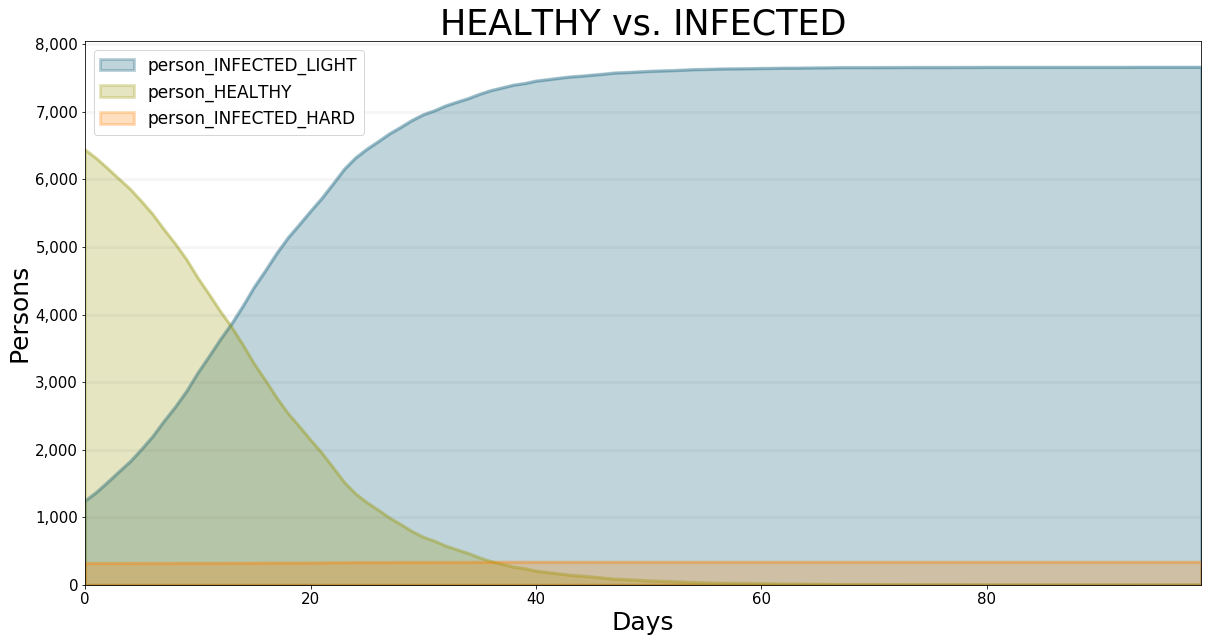

In [2]:
bptk.plot_scenarios(
    scenario_managers=["Covid19"],
    kind="area",
    title="HEALTHY vs. INFECTED",
    x_label="Days",
    y_label="Persons",
    scenarios=["base"],
    agents=["person"],
    agent_states=["HEALTHY","INFECTED_LIGHT","INFECTED_HARD"],
    series_names={
        "person_HEALTHY":"Healthy",
        "person_INFECTED_LIGHT":"Infected with light symptoms",
        "person_INFECTED_HARD":"Infected with strong symptoms",
    },
    visualize_to_period = 100,
    progress_bar=True
    
)

In [3]:
bptk.plot_scenarios(
    scenario_managers=["Covid19"],
    kind="area",
    title="Number Infected Persons",
    x_label="Days",
    y_label="Persons",
    scenarios=["base"],
    agents=["person"],
    agent_states=["HEALTHY","INFECTED_HARD","INFECTED_LIGHT"],
    return_df=True,
    visualize_to_period = 30
)

,person_INFECTED_LIGHT,person_HEALTHY,person_INFECTED_HARD
t,,,
0,1242,6440.0,318
1,1369,6313.0,318
2,1518,6164.0,318
3,1672,6010.0,318
4,1824,5858.0,318
5,2004,5677.0,319
6,2196,5485.0,319
7,2421,5260.0,319
8,2631,5049.0,320


### Finding the reproduction rate R0

The second plot is the more interesting one. It helps us to figure find the solution of our question in the beginning. It describes how many agents one agent infects over a certain period of time, i.e. finding the reproduction rate `R0` of Covid-19. As shown in the plot below, the value for `R0` is under 0.15 person per day.

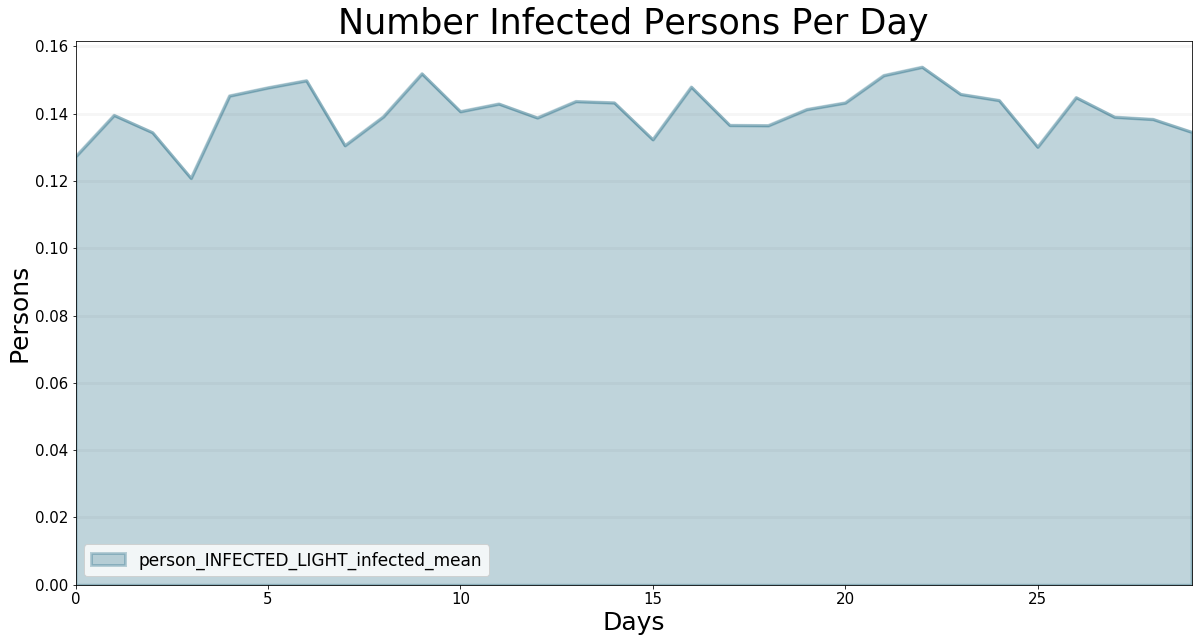

In [4]:
bptk.plot_scenarios(
    scenario_managers=["Covid19"],
    kind="area",
    title="Number Infected Persons Per Day",
    x_label="Days",
    y_label="Persons",
    scenarios=["base"],
    agents=["person"],
    agent_properties=["infected"],
    agent_property_types=["mean"],
    agent_states=["INFECTED_LIGHT"],
    visualize_to_period = 30
)

The above plot gives us a roughly insight of the number of agents getting infected by one agent per day in average. With another feature of BPTK-Py, we can also look at the numbers in a table and compute the average value of `R0` over all days.

In [ ]:
r0_df = bptk.plot_scenarios(
    scenario_managers=["Covid19"],
    kind="area",
    title="Number Infected Persons",
    x_label="Days",
    y_label="Persons",
    scenarios=["base"],
    agents=["person"],
    agent_properties=["infected"],
    agent_property_types=["mean"],
    agent_states=["INFECTED_LIGHT"],
    visualize_to_period = 30,
    return_df=True
)

In [ ]:
print("A person with Covid-19 infects around {} per day.".format(r0_df.mean()["person_INFECTED_LIGHT_infected_mean"]))

The following widget allows you to see how many people one person infects over a certain period of time. Looking at an interval of 20 days, one agent infects around 2 other agents.

In [ ]:
def output_text(x):
    return "A person with Covid-19 infects around {} persons in {} days.".format(round((r0_df.mean()*x)["person_INFECTED_LIGHT_infected_mean"]),x)


In [ ]:
interact(output_text, x=widgets.IntSlider(min=0, max=30, step=1, value=30));